# Day Objectives
## Voting Classifier
- A Voting Classifier is a machine learning model
- predicts an output (class) based on their highest probability of chosen class as the output.
- Voting classifier is quite effective with good estimators & handles individual's limitations, ensemble methods can also participate.
- It's used for both classification and regression
- **Voting Classifier supports two types of votings**
    - Hard Voting: the predicted output class is a class with the highest majority of votes
        - the class which had the highest probability of being predicted by each of the classifiers
    - Soft Voting : the output class is the prediction based on the average of probability given to that class
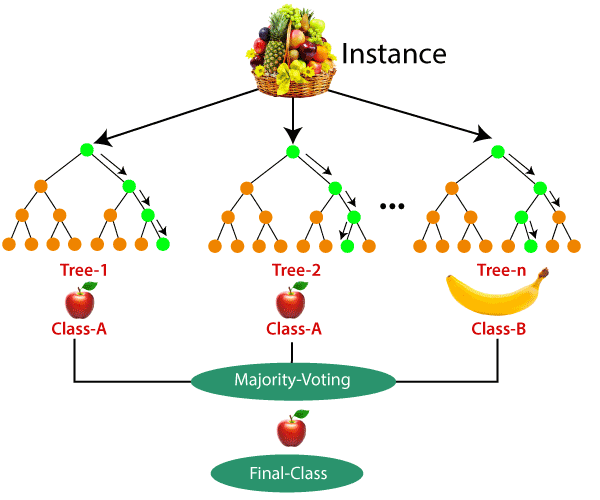




In [2]:
(300+400+300+500+600)/5

420.0

In [3]:
# import required libraries
import pandas as pd
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()
digits
# Optical recognition of handwritten digits dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

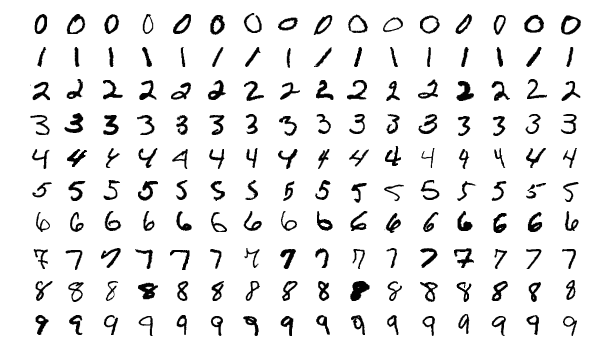

In [8]:
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
# convert dict into Df
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
df.columns = digits.feature_names
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
df["Target"] = digits.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [13]:
df["Target"].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: Target, dtype: int64

In [15]:
X = df[df.columns[:-1]]
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [16]:
y = df["Target"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [20]:
rfc = RandomForestClassifier(n_estimators=20)

In [21]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [23]:
y_pred   = rfc.predict(x_test)

In [27]:
rfc.score(x_test,y_pred) * 100

100.0

In [28]:
lgc = LogisticRegression()

In [29]:
lgc.fit(x_train,y_train)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lgc.fit(x_train,y_train)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred  = lgc.predict(x_test)

In [33]:
lgc.score(x_test,y_pred) * 100

100.0

In [34]:
knn = KNeighborsClassifier()


In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred  = knn.predict(x_test)

In [37]:
knn.score(x_test,y_pred)

1.0

In [44]:
dtc = DecisionTreeClassifier(max_depth=5)

In [46]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
y_pred = dtc.predict(x_test)

In [49]:
dtc.score(x_test,y_test) * 100

67.77777777777779

In [40]:
knn.score(x_test,y_test) * 100

99.33333333333333

In [41]:
lgc.score(x_test,y_test) * 100

97.33333333333334

In [43]:
rfc.score(x_test,y_test) * 100

96.44444444444444

In [83]:
estimators  = [
    ("rfc", RandomForestClassifier(n_estimators=20)),
    ("dtc", DecisionTreeClassifier(max_depth=5)),
    ("knn",KNeighborsClassifier()),
    ("lgc",LogisticRegression()),
    ("svc",SVC())
]

In [84]:
vc = VotingClassifier(estimators=estimators,voting = "hard")

In [85]:
vc.fit(x_train,y_train)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=20)),
                             ('dtc', DecisionTreeClassifier(max_depth=5)),
                             ('knn', KNeighborsClassifier()),
                             ('lgc', LogisticRegression()), ('svc', SVC())])

In [86]:
vc.predict(x_test)

array([3, 3, 1, 3, 7, 7, 1, 0, 3, 8, 1, 7, 7, 6, 1, 0, 0, 5, 2, 9, 3, 9,
       5, 1, 5, 3, 3, 1, 3, 4, 7, 8, 6, 5, 2, 3, 6, 6, 5, 8, 0, 9, 8, 4,
       2, 8, 6, 1, 7, 6, 7, 3, 2, 9, 7, 0, 3, 7, 3, 3, 7, 4, 3, 6, 8, 9,
       4, 7, 2, 0, 9, 6, 5, 1, 1, 2, 6, 5, 2, 0, 0, 2, 9, 2, 1, 2, 0, 9,
       9, 5, 9, 5, 7, 9, 5, 1, 0, 4, 9, 1, 4, 6, 4, 5, 7, 2, 2, 7, 8, 7,
       7, 1, 2, 1, 2, 9, 7, 9, 3, 9, 5, 4, 8, 6, 9, 9, 2, 6, 8, 9, 2, 5,
       8, 4, 2, 9, 8, 8, 7, 5, 9, 3, 5, 7, 7, 0, 5, 8, 9, 9, 8, 5, 6, 2,
       8, 8, 4, 5, 0, 9, 4, 8, 6, 0, 7, 0, 6, 5, 5, 7, 8, 4, 4, 2, 9, 4,
       3, 1, 1, 7, 9, 0, 7, 3, 6, 7, 3, 4, 0, 4, 3, 0, 7, 4, 2, 4, 1, 8,
       9, 6, 3, 3, 2, 0, 9, 4, 5, 5, 3, 7, 2, 9, 8, 7, 6, 8, 4, 9, 1, 9,
       4, 3, 4, 5, 6, 6, 7, 2, 8, 8, 0, 4, 0, 8, 6, 1, 8, 2, 7, 4, 1, 5,
       1, 4, 4, 6, 6, 1, 8, 3, 5, 6, 6, 5, 5, 9, 9, 5, 9, 9, 8, 9, 4, 2,
       7, 6, 2, 6, 2, 0, 3, 7, 5, 5, 5, 0, 0, 6, 6, 6, 2, 6, 3, 2, 1, 3,
       0, 3, 5, 9, 5, 6, 3, 9, 5, 3, 6, 7, 8, 3, 1,

In [88]:
vc.score(x_test,y_test)

0.9866666666666667

In [73]:
vc = VotingClassifier(estimators=estimators,voting = "soft",weights = [2,.1,3,2,2] )

In [74]:
vc.fit(x_train,y_train)

C:\Users\lavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=20)),
                             ('dtc', DecisionTreeClassifier(max_depth=5)),
                             ('knn', KNeighborsClassifier()),
                             ('lgc', LogisticRegression()), ('svc', SVC())],
                 voting='soft', weights=[2, 0.1, 3, 2, 2])

In [75]:
vc.predict(x_test)

AttributeError: predict_proba is not available when  probability=False

In [76]:
vc.score(x_test,y_test)

AttributeError: predict_proba is not available when  probability=False

In [92]:
for est,name in zip(vc.estimators_,vc.estimators):
    print(name[0]," : ",est)

rfc  :  RandomForestClassifier(n_estimators=20)
dtc  :  DecisionTreeClassifier(max_depth=5)
knn  :  KNeighborsClassifier()
lgc  :  LogisticRegression()
svc  :  SVC()


In [93]:
for est,name in zip(vc.estimators_,vc.estimators):
    print(name[0]," : ",est.score(x_test,y_test)*100)

rfc  :  96.66666666666667
dtc  :  67.55555555555556
knn  :  99.33333333333333
lgc  :  97.33333333333334
svc  :  99.11111111111111


In [91]:
vc.score(x_test,y_test)

0.9866666666666667

## Boosting classifier 
- It is an ensemble modeling technique which attempts to build a strong classifier from the number of weak classifiers

**AdaBoost** 
- It was the first really successful boosting algorithm developed for the purpose of binary classification.
- AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”.
- Boosting in general is about building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.
- AdaBoost can be used for both classification & regression

In [103]:
dtc.score(x_train,y_train) * 100

70.30438010393468

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),n_estimators=600)

In [100]:
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=600)

In [101]:
ada.predict(x_test)

array([3, 3, 1, 3, 7, 7, 1, 0, 8, 8, 1, 7, 7, 6, 1, 0, 0, 8, 2, 9, 3, 9,
       5, 1, 5, 3, 3, 1, 3, 4, 7, 8, 6, 5, 2, 3, 6, 6, 5, 8, 0, 9, 8, 4,
       2, 8, 6, 8, 7, 6, 7, 3, 2, 9, 7, 0, 3, 7, 3, 3, 7, 4, 3, 6, 8, 9,
       4, 7, 2, 0, 9, 6, 5, 1, 1, 2, 6, 5, 2, 0, 0, 2, 9, 2, 1, 2, 0, 9,
       9, 5, 9, 5, 7, 9, 5, 1, 0, 4, 9, 1, 4, 6, 4, 9, 7, 2, 2, 7, 8, 7,
       7, 1, 2, 1, 2, 9, 7, 9, 3, 9, 5, 4, 8, 6, 9, 9, 2, 6, 8, 9, 2, 5,
       8, 4, 2, 9, 8, 8, 7, 5, 9, 3, 5, 7, 7, 0, 5, 8, 9, 9, 8, 5, 6, 2,
       8, 8, 4, 5, 0, 9, 4, 8, 6, 0, 7, 0, 6, 5, 5, 7, 8, 4, 4, 2, 9, 4,
       3, 1, 1, 7, 9, 0, 7, 3, 6, 7, 3, 4, 0, 4, 3, 0, 7, 4, 2, 4, 1, 8,
       9, 6, 3, 3, 2, 0, 9, 4, 5, 5, 8, 7, 2, 9, 8, 7, 6, 8, 4, 9, 1, 9,
       4, 3, 4, 5, 6, 6, 7, 2, 8, 8, 0, 4, 0, 8, 6, 1, 8, 2, 7, 4, 1, 5,
       1, 4, 4, 1, 6, 1, 8, 3, 5, 6, 6, 5, 5, 9, 9, 5, 9, 9, 8, 9, 4, 2,
       7, 6, 2, 6, 2, 0, 3, 7, 5, 5, 5, 0, 0, 6, 6, 6, 2, 6, 3, 2, 1, 3,
       0, 3, 5, 9, 5, 6, 3, 9, 5, 3, 6, 7, 8, 3, 1,

In [104]:
ada.score(x_test,y_test) * 100

97.33333333333334

In [109]:
print("""score of AdaBoosting Classifier is {0} \n and score of Decision Tree classifier is {1} 
       \n  i got {2} % increased  after applying ada bossting """.format( ada.score(x_test,y_test) * 100,
      dtc.score(x_train,y_train) * 100,
      ada.score(x_test,y_test) * 100  - dtc.score(x_train,y_train) * 100))

score of AdaBoosting Classifier is 97.33333333333334 
 and score of Decision Tree classifier is 70.30438010393468 
       
  i got 27.028953229398667 % increased  after applying ada bossting 


# Task:
- read Titanic data
- calculate score of every classifier 
- calculate score of hard voting classfier
- if any model got less accuracy then apply adaboosting classifier and improve the performance

# AdaBoosting Regressor

In [33]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/age_salary_hours.csv")
df

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher
...,...,...,...,...
495,27,47000.0,40.0,Bachelor's degree or higher
496,53,132000.0,70.0,Bachelor's degree or higher
497,51,10100.0,20.0,Bachelor's degree or higher
498,32,57000.0,35.0,Bachelor's degree or higher


In [34]:
df = df.drop('Education',axis = 1)
df

,Age,Annual Salary,Weekly hours
0,72,160000.0,40.0
1,72,100000.0,50.0
2,31,120000.0,40.0
3,28,45000.0,40.0
4,54,85000.0,40.0
...,...,...,...
495,27,47000.0,40.0
496,53,132000.0,70.0
497,51,10100.0,20.0
498,32,57000.0,35.0


In [35]:
X = df[["Age","Weekly hours"]]
X

,Age,Weekly hours
0,72,40.0
1,72,50.0
2,31,40.0
3,28,40.0
4,54,40.0
...,...,...
495,27,40.0
496,53,70.0
497,51,20.0
498,32,35.0


In [36]:
y = df["Annual Salary"]

In [37]:
df.shape

(500, 3)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6)

In [40]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [41]:
x_train.shape

(350, 2)

In [42]:
y_train.shape

(350,)

In [43]:
y_pred = dtree.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred) * 100

31.333333333333336

In [46]:
from sklearn.ensemble import AdaBoostRegressor

In [51]:
adr = AdaBoostRegressor(base_estimator=DecisionTreeClassifier(max_depth=7))

In [52]:
adr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeClassifier(max_depth=7))

In [53]:
y_pred = adr.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred) * 100

28.666666666666668